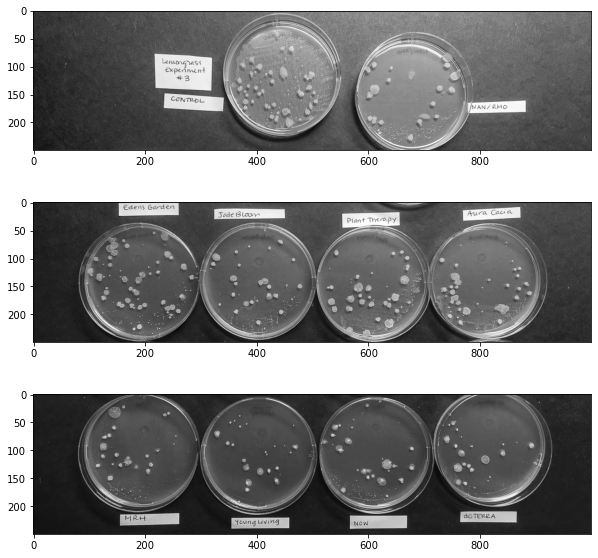

In [1]:
# This is Saleh

from PIL import Image
from PIL import ImageOps

im = Image.open('results_L3.jpg')
img = ImageOps.grayscale(im)
# img.save('greyscale.png')

import imageio

import matplotlib.pyplot as plt

import scipy.ndimage as ndimage



w, h = img.size
   
# Setting the points for cropped image 
left = 0
top = 0
right = w
bottom = h/3
  

img_1 = img.crop((left, top, right, bottom)) 

left = 0
top = h/3
right = w
bottom = 2*h/3
  

img_2 = img.crop((left, top, right, bottom))  


left = 0
top = 2*h/3
right = w
bottom = h-
  

img_3 = img.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
#img1.show() 

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 10))

ax1.imshow(img_1, cmap='gray')
ax2.imshow(img_2, cmap='gray')
ax3.imshow(img_3, cmap='gray')



img_3.save('lowest_row.png')




(1000, 750)